In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segu´n los siguientes puntos:

+ Si el par´ametro color vale 1, la imagen debe mostrar activos u´nicamente el color azul.
+ Si el par´ametro color vale 2, la imagen debe mostrar activos u´nicamente el color verde.
+ Si el par´ametro color vale 3, la imagen debe mostrar activos u´nicamente el color rojo.
+ Si el par´ametro color vale 10, la imagen debe mostrar activos u´nicamente los colores rojo y verde.
+ Si el par´ametro color vale 20, la imagen debe mostrar activos u´nicamente los colores verde y azul.
+ Si el par´ametro color vale 30, la imagen debe mostrar activos u´nicamente los colores azul y rojo.

In [17]:
def ImagenColor(imagen, color: int):
    img=cv2.imread(imagen)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    hgt=img.shape[0]
    wgt=img.shape[1]
        
    monocromo = np.zeros((hgt,wgt,3))

    for i in range(0, hgt):
        for j in range(0, wgt):
            pixel=img[i,j]
            #extraemos los canales
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if color == 1:
                monocromo[i,j] = [0, 0, blue] #aplicamos transformacion azul
            elif color == 2:
                monocromo[i,j] = [0, green, 0] #aplicamos transformacion verde
            elif color == 3:
                monocromo[i,j] = [red, 0, 0] #aplicamos transformacion rojo
            elif color == 10:
                monocromo[i,j] = [red, green, 0] #aplicamos transformacion rojo verde
            elif color == 20:
                monocromo[i,j] = [0, green, blue] #aplicamos transformacion verde azul
            elif color == 30:
                monocromo[i,j] = [red, 0, blue] #aplicamos transformacion rojo azul
            else:
                monocromo[i,j] = [red, green, blue] #aplicamos transformacion rojo azul
    cv2.imwrite("monocromo.jpg",monocromo)
    monocromo= cv2.imread("monocromo.jpg")
    monocromo= cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)
    plt.imshow(monocromo)
    plt.show()

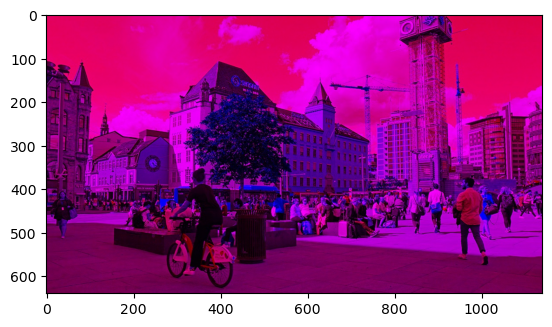

In [20]:
ImagenColor("noruega-intro.jpg", 30)

#### Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funci´on que dadas las 3 imagenes se construya la imagen original a color.

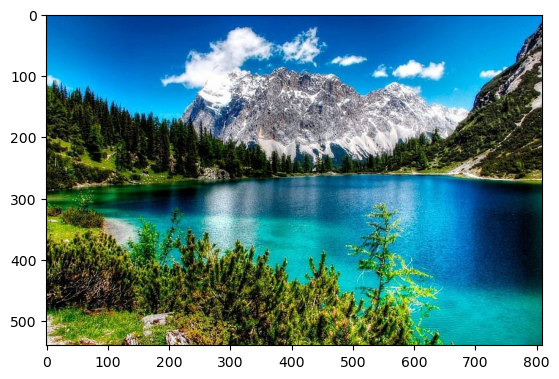

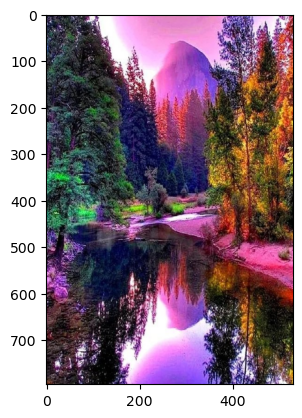

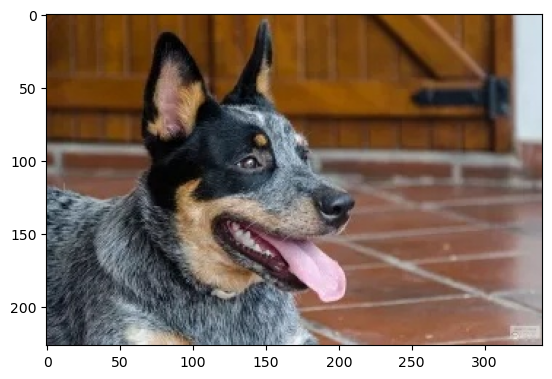

In [4]:
def construir_imagen_color(image_red, image_green, image_blue, numero=1):
    # Crear una imagen a color con tres canales vacíos
    img_R = cv2.imread(image_red, cv2.IMREAD_GRAYSCALE)
    img_G = cv2.imread(image_green, cv2.IMREAD_GRAYSCALE)
    img_B = cv2.imread(image_blue, cv2.IMREAD_GRAYSCALE)
    img_file = "imagen_color"+str(numero)+".jpg"
    

    img_RGB = cv2.merge((img_B, img_G, img_R))
   # Mostrar la imagen a color resultante
    cv2.imwrite(img_file, img_RGB)
    img_RGB= cv2.imread(img_file)
    img_RGB= cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

imagen_color1 = construir_imagen_color("imagen1/imagen1_salida_gray_rojo.jpg", "imagen1/imagen1_salida_gray_verde.jpg", "imagen1/imagen1_salida_gray_azul.jpg",1)
imagen_color2 = construir_imagen_color("imagen2/imagen2_salida_gray_rojo.jpg", "imagen2/imagen2_salida_gray_verde.jpg", "imagen2/imagen2_salida_gray_azul.jpg",2)
imagen_color3 = construir_imagen_color("imagen3/perro_salida_gray_rojo.jpg", "imagen3/perro_salida_gray_verde.jpg", "imagen3/perro_salida_gray_azul.jpg",3)



#### Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

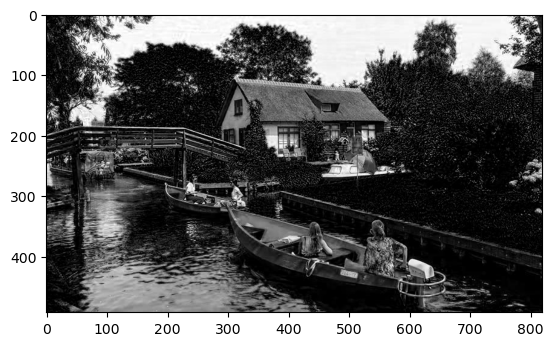

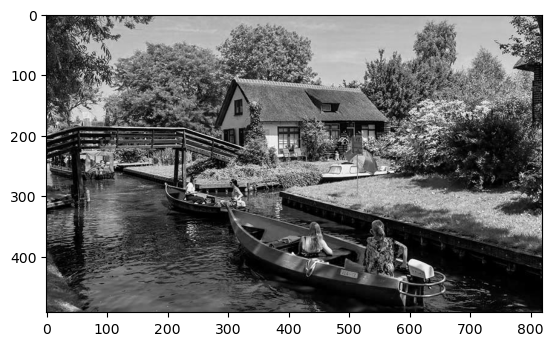

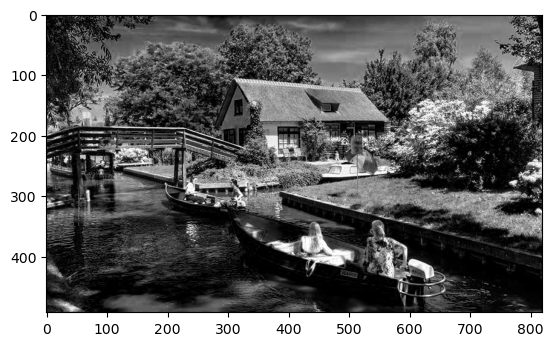

In [7]:
def imagenes_escala_gris(imagen):
    # Cargar la imagen a color
    img = cv2.imread(imagen)
    # Obtener los canales de color de la imagen
    cBlue, cGreen, cRed = cv2.split(img)

    # Convertir cada canal a una imagen en escala de grises de tres dimensiones
    img_B = cv2.merge((cBlue, cBlue, cBlue))
    img_G = cv2.merge((cGreen, cGreen, cGreen))
    img_R = cv2.merge((cRed, cRed, cRed))

# Mostrar las imágenes resultantes
    cv2.imwrite("img_salida_Blue.jpg", img_B)
    cv2.imwrite("img_salida_Green.jpg", img_G)
    cv2.imwrite("img_salida_Red.jpg", img_R)
    img_B= cv2.imread("img_salida_Blue.jpg")
    img_G= cv2.imread("img_salida_Green.jpg")
    img_R= cv2.imread("img_salida_Red.jpg")
    img_B= cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)
    img_G= cv2.cvtColor(img_G, cv2.COLOR_BGR2RGB)
    img_R= cv2.cvtColor(img_R, cv2.COLOR_BGR2RGB)

    plt.imshow(img_B)
    plt.show()
    plt.imshow(img_G)
    plt.show()
    plt.imshow(img_R)
    plt.show()


# Crear las tres imágenes en escala de grises de tres dimensiones
imagenes_escala_gris("holanda.jpg")


#### Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion.

Histograma Azul:


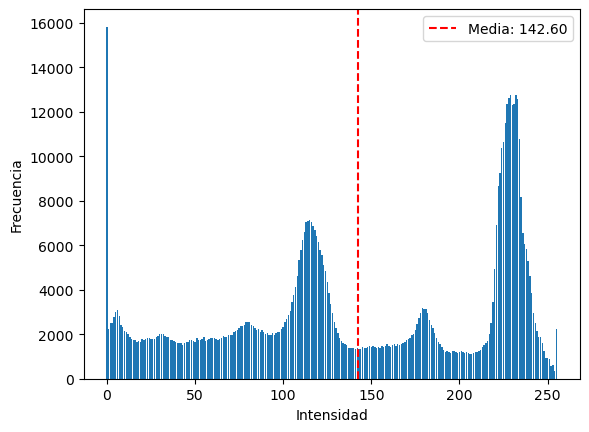

Histograma Verde:


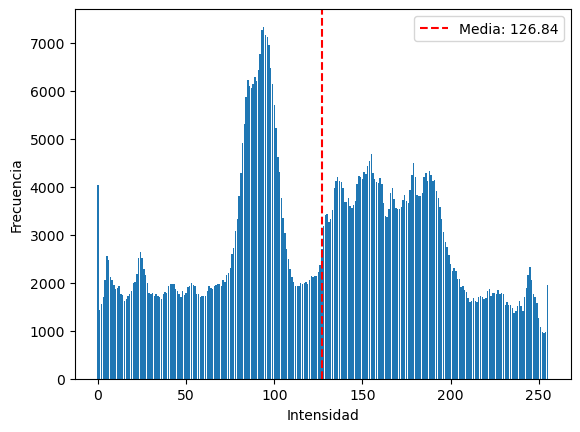

Histograma Rojo:


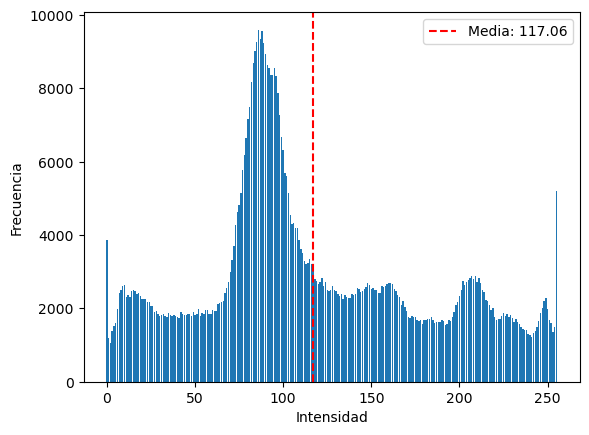

Histograma de Escala de Grises:


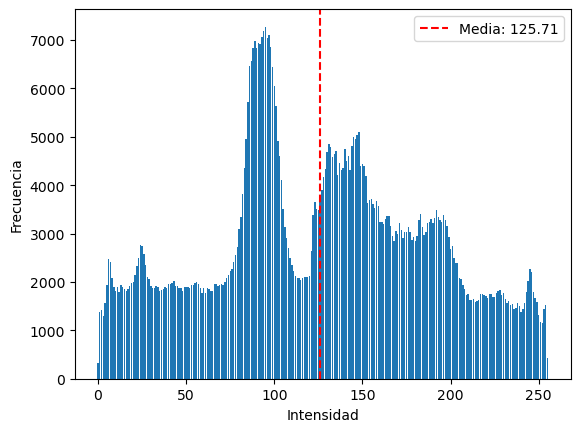

In [11]:
def calcular_hist(imagen):
    # Crear un histograma de 256 bits
    histograma = np.zeros(256, dtype=int)
    
    # Recorrer la imagen y contar la frecuencia de cada intensidad
    for fila in imagen:
        for pixel in fila:
            intensidad = int(np.mean(pixel))  # Promedio aritmético para escala de grises
            histograma[intensidad] += 1
    
    return histograma

def show_hist_mean(histograma):
    # Calcular la media de la distribución
    valores = np.arange(256)
    media = np.sum(valores * histograma) / np.sum(histograma)
    
    # Mostrar el histograma y la línea vertical para la media
    plt.bar(np.arange(256), histograma)
    plt.axvline(x=media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Cargar la imagen
imagen = cv2.imread('noruega-intro.jpg')

# Mostrar el histograma para cada canal de color y el histograma de escala de grises
for i, color in enumerate(['Azul', 'Verde', 'Rojo']):
    histograma_color = calcular_hist(imagen[:, :, i])
    print(f"Histograma {color}:")
    show_hist_mean(histograma_color)

hist_gris = calcular_hist(cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY))
print("Histograma de Escala de Grises:")
show_hist_mean(hist_gris)
